In [1]:
# useful additional packages 
import time
from qiskit import QuantumCircuit, Aer, execute
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import numpy as np
import networkx as nx
from qiskit import Aer, execute, QuantumCircuit
from qiskit.quantum_info import Statevector

# auxilliary function to plot graphs
def plot_result(G, x):
    colors = ['r' if x[i] == 0 else 'b' for i in range(n)]
    pos, default_axes = nx.spring_layout(G), plt.axes(frameon=True)
    nx.draw_networkx(G, node_color=colors, node_size=600, alpha=.8, pos=pos)

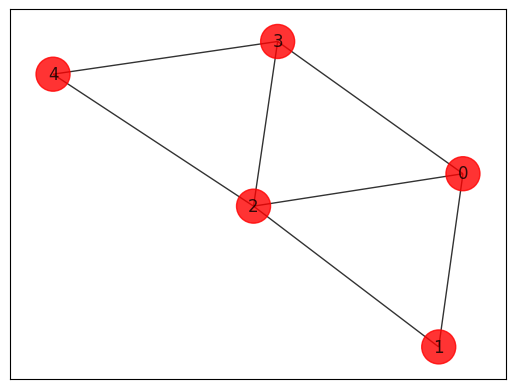

In [22]:
# create graph
G = nx.Graph()

# add nodes
n = 5
G.add_nodes_from(range(n))

# add edges: tuple is (i,j,weight) where (i,j) is the edge
edges = [(0, 1, 1.0), (0, 2, 1.0), (0, 3, 1.0), (1, 2, 1.0), (2, 3, 1.0), (2, 4, 1.0), (3, 4, 1.0)]
G.add_weighted_edges_from(edges)

# plot graph
plot_result(G, [0]*n)

In [3]:
from docplex.mp.model import Model

mdl = Model('MaxCut')
x = mdl.binary_var_list('x{}'.format(i) for i in range(n))

objective = mdl.sum([ w * (x[i] + x[j] - 2*x[i]*x[j]) for (i, j, w) in edges])
mdl.maximize(objective)

mdl.prettyprint()

// This file has been generated by DOcplex
// model name is: MaxCut
// var contrainer section
dvar bool x[5];

maximize
 3 x0 + 2 x1 + 4 x2 + 3 x3 + 2 x4 [ - 2 x0*x1 - 2 x0*x2 - 2 x0*x3 - 2 x1*x2
 - 2 x2*x3 - 2 x2*x4 - 2 x3*x4 ];
 
subject to {

}


In [4]:
b = 2
mdl.add_constraint(mdl.sum(x) == b)
mdl.prettyprint()

// This file has been generated by DOcplex
// model name is: MaxCut
// var contrainer section
dvar bool x[5];

maximize
 3 x0 + 2 x1 + 4 x2 + 3 x3 + 2 x4 [ - 2 x0*x1 - 2 x0*x2 - 2 x0*x3 - 2 x1*x2
 - 2 x2*x3 - 2 x2*x4 - 2 x3*x4 ];
 
subject to {
 x0 + x1 + x2 + x3 + x4 == 2;

}


C:\Users\xkirk\anaconda3\envs\qiskit-opt254\lib\site-packages\qiskit\optimization\__init__.py:92: DeprecationWarning: The package qiskit.optimization is deprecated. It was moved/refactored to qiskit_optimization (pip install qiskit-optimization). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>
  warn_package('optimization', 'qiskit_optimization', 'qiskit-optimization')


optimal function value: 5.0
optimal value: [0. 0. 1. 1. 0.]
status: SUCCESS


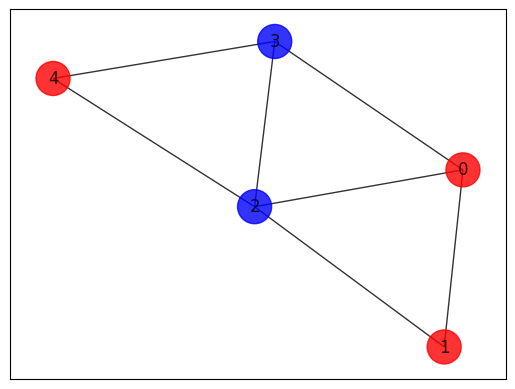

In [5]:
from qiskit.optimization import QuadraticProgram
from qiskit.optimization.algorithms import CplexOptimizer

# convert from DOcplex model to Qiskit Quadratic Program
qp = QuadraticProgram()
qp.from_docplex(mdl)

# Solve Quadratic Program using CPLEX
cplex = CplexOptimizer()
result = cplex.solve(qp)
print(result)
plot_result(G, result.x)

In [6]:
from qiskit.optimization.converters import (
    InequalityToEquality,     # converts inequality constraints to equality constraints by adding slack variables
    LinearEqualityToPenalty,  # converts linear equality constraints to quadratic penalty terms 
    IntegerToBinary,          # converts integer variables to binary variables
    QuadraticProgramToQubo    # combines the previous three converters
)

In [7]:
lineq2penalty = LinearEqualityToPenalty(penalty=1)
qp_wo_constr = lineq2penalty.convert(qp)
qp_wo_constr

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: MaxCut

Maximize
 obj: 7 x0 + 6 x1 + 8 x2 + 7 x3 + 6 x4 + [ - 2 x0^2 - 8 x0*x1 - 8 x0*x2
      - 8 x0*x3 - 4 x0*x4 - 2 x1^2 - 8 x1*x2 - 4 x1*x3 - 4 x1*x4 - 2 x2^2
      - 8 x2*x3 - 8 x2*x4 - 2 x3^2 - 8 x3*x4 - 2 x4^2 ]/2 -4
Subject To

Bounds
 0 <= x0 <= 1
 0 <= x1 <= 1
 0 <= x2 <= 1
 0 <= x3 <= 1
 0 <= x4 <= 1

Binaries
 x0 x1 x2 x3 x4
End

In [8]:
H, offset = qp_wo_constr.to_ising()
print('offset =', offset)
print()
print('H =', H)

offset = -2.0

H = SummedOp([
  -0.5 * IIIIZ,
  -0.5 * IIIZI,
  -0.5 * IIZII,
  -0.5 * IZIII,
  -0.5 * ZIIII,
  IIIZZ,
  IIZIZ,
  IIZZI,
  IZIIZ,
  0.5 * IZIZI,
  IZZII,
  0.5 * ZIIIZ,
  0.5 * ZIIZI,
  ZIZII,
  ZZIII
])


C:\Users\xkirk\anaconda3\envs\qiskit-opt254\lib\site-packages\qiskit\aqua\operators\operator_base.py:46: DeprecationWarning: The package qiskit.aqua.operators is deprecated. It was moved/refactored to qiskit.opflow (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>
  warn_package('aqua.operators', 'qiskit.opflow', 'qiskit-terra')


In [9]:
from qiskit.circuit import Parameter
gamma, beta = Parameter('gamma'), Parameter('beta')

qc = QuantumCircuit(1)
qc.h(0)
qc.barrier()
qc.rz(gamma, 0)
qc.rx(beta, 0)
qc.barrier()
qc.draw()

┌───┐ ░ ┌───────────┐┌──────────┐ ░ 
q_0: ┤ H ├─░─┤ RZ(gamma) ├┤ RX(beta) ├─░─
     └───┘ ░ └───────────┘└──────────┘ ░

In [10]:
gamma = Parameter('gamma')
qc1 = QuantumCircuit(2)
qc1.cx(0, 1)
qc1.rz(gamma, 1)
qc1.cx(0, 1)
qc1.draw()

q_0: ──■─────────────────■──
     ┌─┴─┐┌───────────┐┌─┴─┐
q_1: ┤ X ├┤ RZ(gamma) ├┤ X ├
     └───┘└───────────┘└───┘

In [11]:
from qiskit.aqua.components.optimizers import COBYLA

In [12]:
# QAOA circuit for p = 1
gamma, beta = Parameter('gamma'), Parameter('beta')
qc = QuantumCircuit(1)
qc.h(0)
qc.rz(gamma, 0)
qc.rx(beta, 0)

def objective(params):
    qc_ = qc.bind_parameters({gamma: params[0], beta: params[1]})
    probs = Statevector.from_instruction(qc_).probabilities()
    return probs @ [1, -1]

optimizer = COBYLA()
result = optimizer.optimize(num_vars=2, objective_function=objective, initial_point=[0.5, 0.5])
print('optimal params:', np.round(result[0], decimals=4))
print('optimal value: ', np.round(result[1], decimals=4))
print('optimal state: ', np.round(Statevector.from_instruction(qc.bind_parameters(
    {gamma: result[0][0], beta: result[0][1]})).data, decimals=4))

C:\Users\xkirk\anaconda3\envs\qiskit-opt254\lib\site-packages\qiskit\aqua\components\optimizers\optimizer.py:49: DeprecationWarning: The package qiskit.aqua.components.optimizers is deprecated. It was moved/refactored to qiskit.algorithms.optimizers (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>
  warn_package('aqua.components.optimizers',


optimal params: [-1.5708  1.5709]
optimal value:  -1.0
optimal state:  [-0.    -0.j      0.7071-0.7071j]


In [13]:
from qiskit.aqua.algorithms.minimum_eigen_solvers.qaoa.var_form import QAOAVarForm

In [14]:
def construct_schedule(T, N):
    delta_t = T/N
    gammas, betas = [], []  # H_C, H_X parameters
    for i in range(N+1):
        t = i * delta_t
        gammas += [ 2 * delta_t * t/T ]  # H_C
        betas += [ -2 * delta_t * (1 - t/T) ]  # H_X
    return gammas, betas

In [15]:
T = 5
N = 10
gammas, betas = construct_schedule(T, N)

In [16]:
# construct parameters from annealing schedule
T = 10
N = 20
gammas, betas = construct_schedule(T, N)

# construct variational form
var_form = QAOAVarForm(H, N+1)

# evaluate circuit
qc = var_form.construct_circuit(gammas + betas)
sv = Statevector.from_instruction(qc)

C:\Users\xkirk\anaconda3\envs\qiskit-opt254\lib\site-packages\qiskit\aqua\components\variational_forms\variational_form.py:48: DeprecationWarning: The package qiskit.aqua.components.variational_forms is deprecated. For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>
  warn_package('aqua.components.variational_forms')


dim(H): (32, 32)
[[ 6.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  4.  0.  0.]
 [ 0.  0.  0. ...  0.  3.  0.]
 [ 0.  0.  0. ...  0.  0. 11.]]


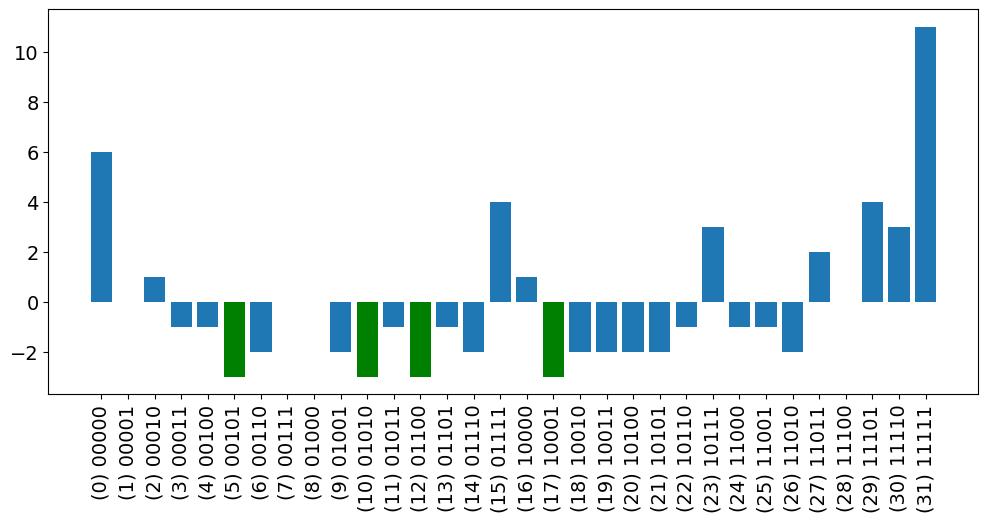

In [17]:
# print Ising Hamiltonian as matrix
H_matrix = np.real(H.to_matrix())
print('dim(H):', H_matrix.shape)
print(H_matrix)

# plot diagonal of matrix
opt_indices = list(np.where(H_matrix.diagonal() == min(H_matrix.diagonal())))[0]
plt.figure(figsize=(12, 5))
plt.bar(range(2**n), H_matrix.diagonal())
plt.bar(opt_indices, H_matrix.diagonal()[opt_indices], color='g')
plt.xticks(range(2**n), ['('+str(i)+') {0:05b}'.format(i) for i in range(2**n)], rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

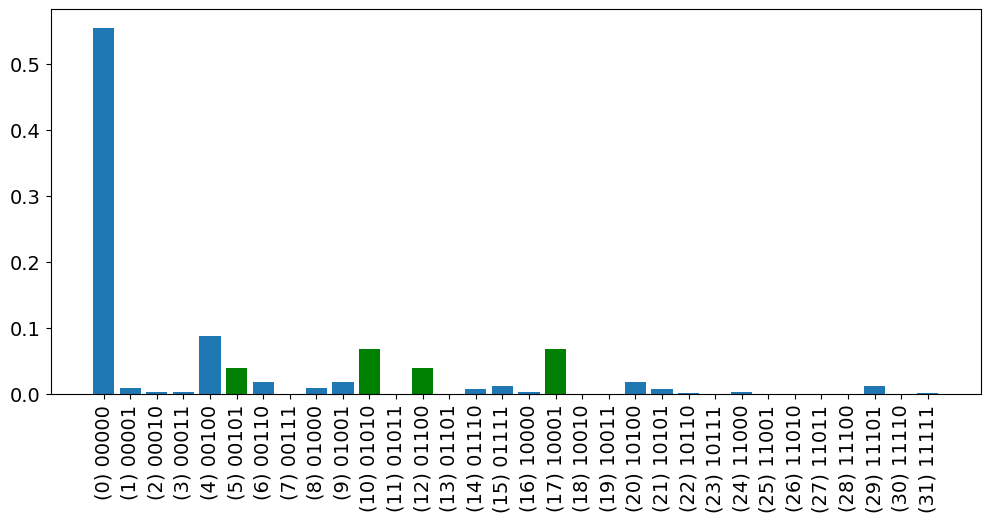

In [18]:
# plot probabilities
probabilities = sv.probabilities()
plt.figure(figsize=(12, 5))
plt.bar(range(2**n), probabilities)
plt.bar(opt_indices, probabilities[opt_indices], color='g')
plt.xticks(range(2**n), ['('+str(i)+') {0:05b}'.format(i) for i in range(2**n)], rotation=90, fontsize=14)
plt.yticks(fontsize=14);

In [19]:
from qiskit.aqua.algorithms import QAOA

qaoa_mes = QAOA(H, p=1, optimizer=optimizer, quantum_instance=Aer.get_backend('statevector_simulator'))
result = qaoa_mes.run()

print('optimal params:      ', result.optimal_parameters)
print('optimal value:       ', result.optimal_value)
print('optimal probability: ', sum(np.abs(result.eigenstate[opt_indices])**2))

C:\Users\xkirk\anaconda3\envs\qiskit-opt254\lib\site-packages\qiskit\aqua\algorithms\vq_algorithm.py:70: DeprecationWarning: The class qiskit.aqua.algorithms.VQAlgorithm is deprecated. It was moved/refactored to qiskit.algorithms.VariationalAlgorithm (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>
  warn_class('aqua.algorithms.VQAlgorithm',
C:\Users\xkirk\anaconda3\envs\qiskit-opt254\lib\site-packages\qiskit\aqua\quantum_instance.py:135: DeprecationWarning: The class qiskit.aqua.QuantumInstance is deprecated. It was moved/refactored to qiskit.utils.QuantumInstance (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>
  warn_class('aqua.QuantumInstance',
C:\Users\xkirk\anaconda3\envs\qiskit-opt254\lib\site-packages\qiskit\aqua\algorithms\quantum_algorithm.py:46: DeprecationWarning: The variable qiskit.aqua.aqua_globals is depreca

optimal params:       {ParameterVectorElement(θ[0]): 2.483093145470526, ParameterVectorElement(θ[1]): 7.158484196386853}
optimal value:        -0.9279618933120611
optimal probability:  0.019684909343842767


In [20]:
from qiskit.optimization.algorithms import MinimumEigenOptimizer

optimal function value: 5.0
optimal value: [1. 0. 1. 0. 0.]
status: SUCCESS


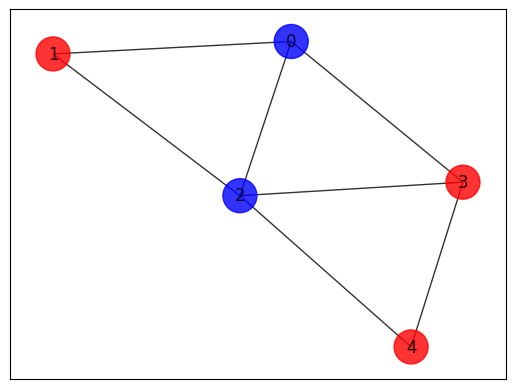

In [27]:
# construct QAOA as Minimum Eigensolver
qaoa_mes = QAOA(p=1, optimizer=optimizer, quantum_instance=Aer.get_backend('statevector_simulator'))

# construct Minimum Eigen Optimizer based on QAOA
qaoa = MinimumEigenOptimizer(qaoa_mes)

# solve Quadratic Program
result = qaoa.solve(qp)
print(result)
plot_result(G, result.x)
